0
0
300
300
0
0
1.1373


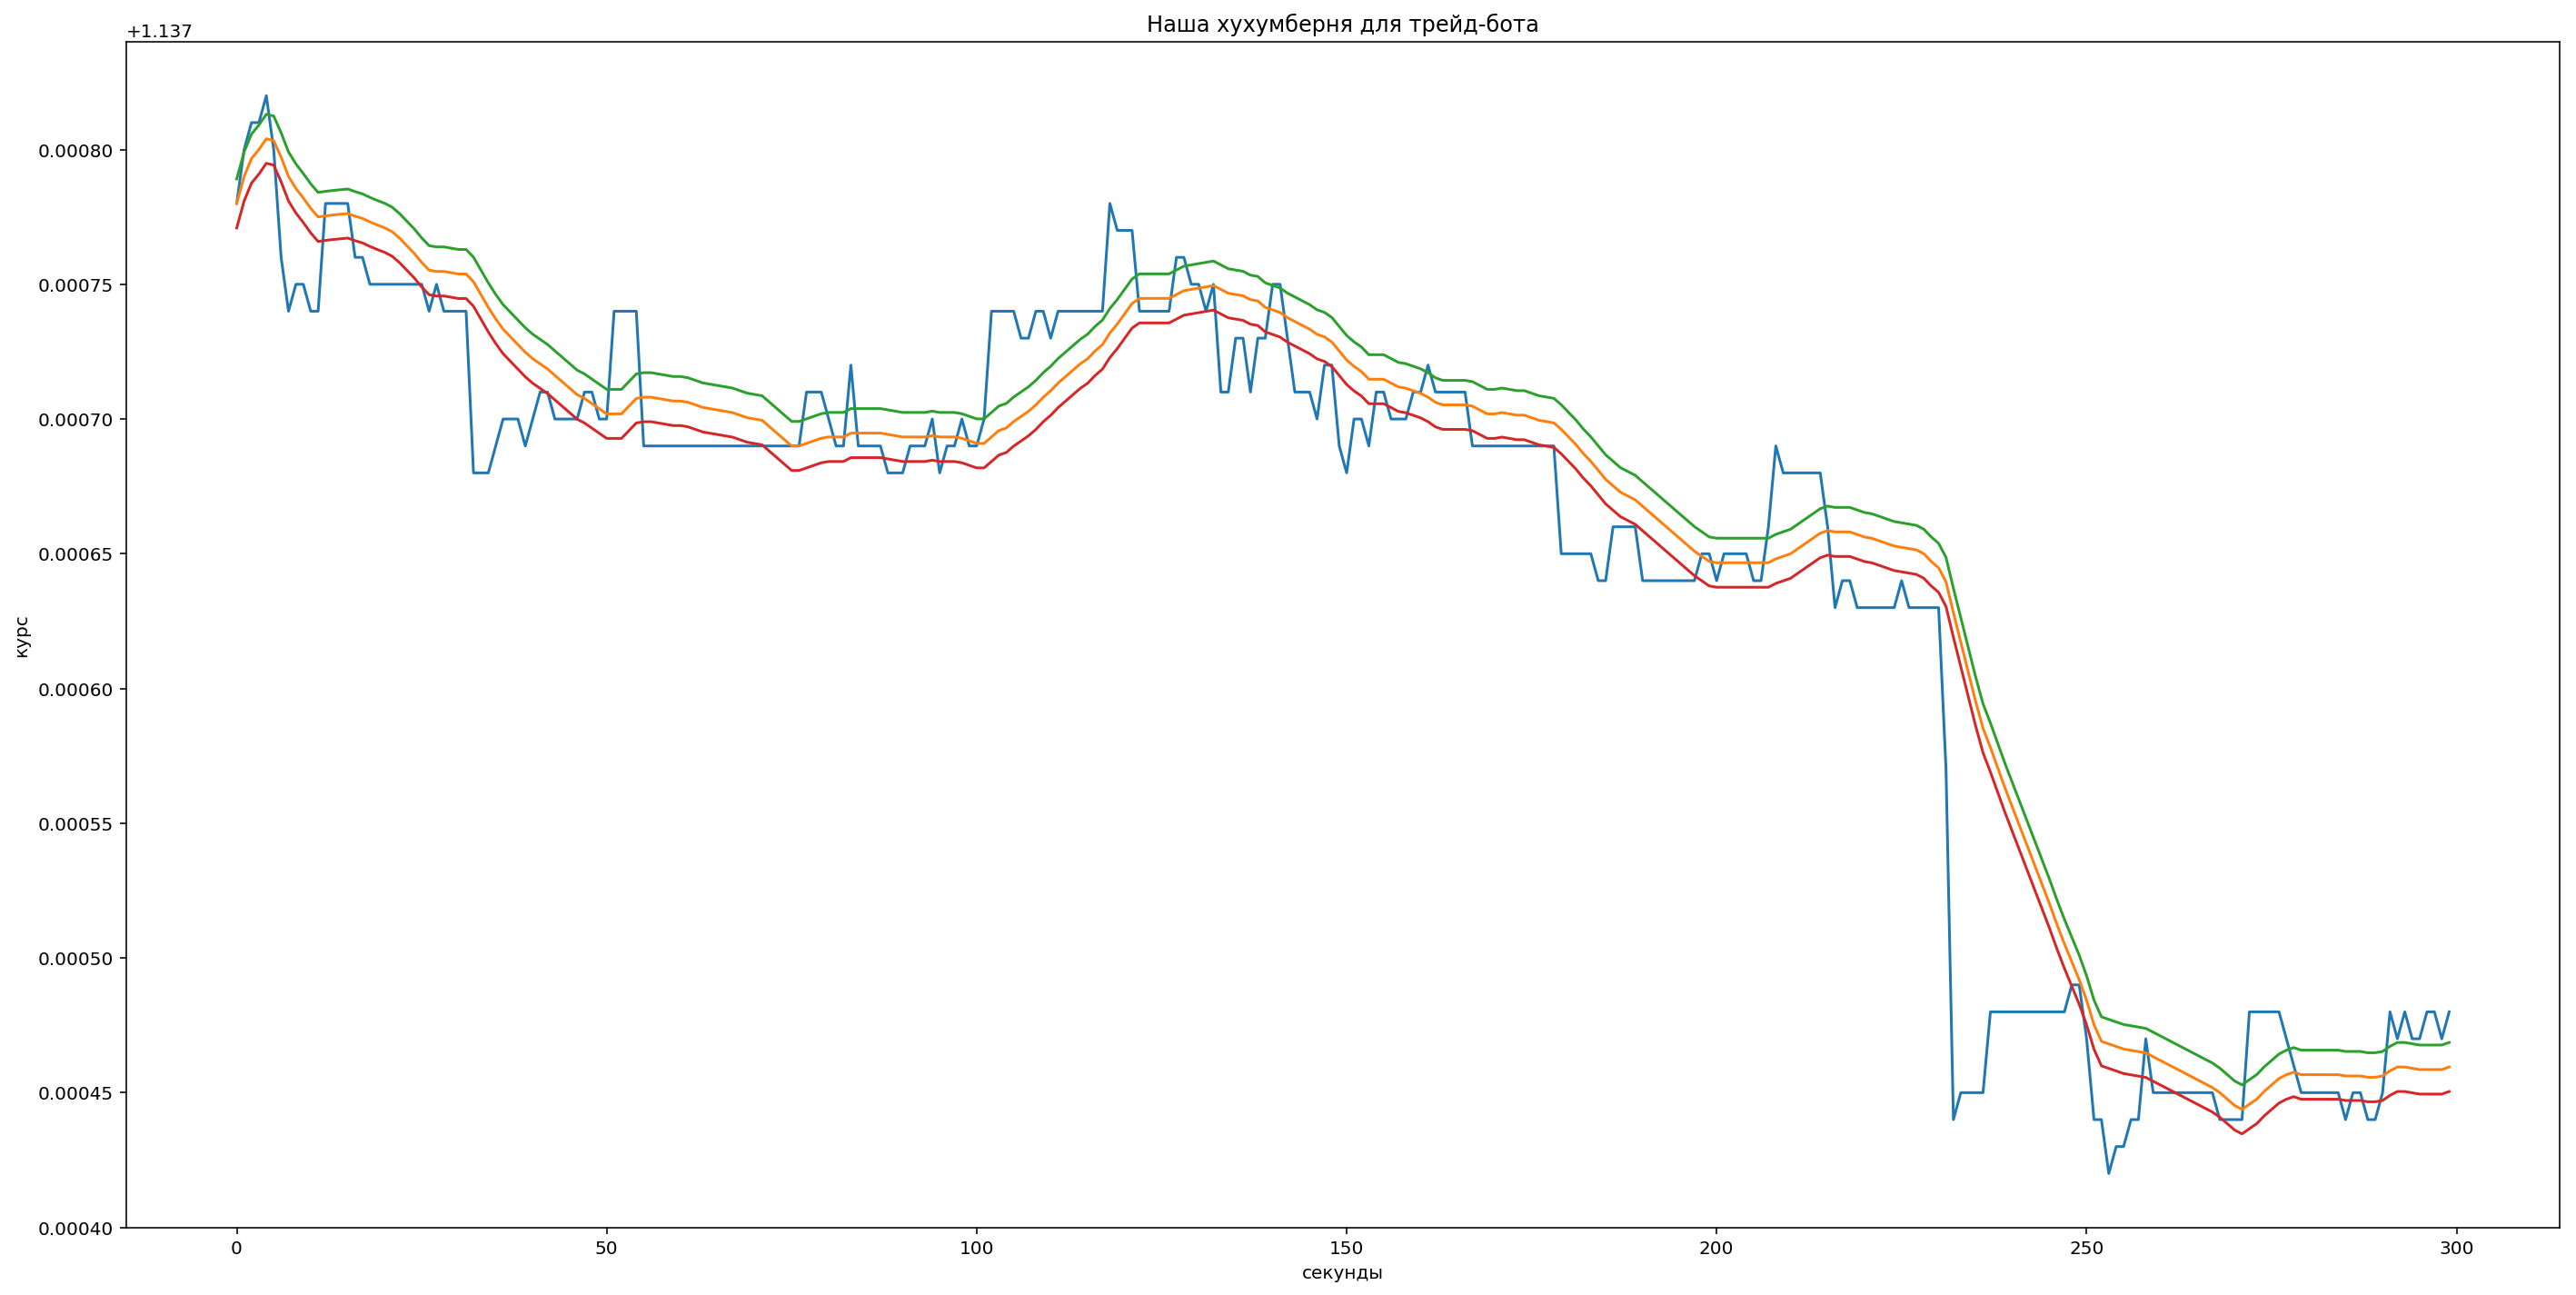

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

a = []
work_np = []
i = 0
j = 0
fi = 0
indexinger = 0
stavka = 0
stroka = ''
koridor = np.array([])
sr_zn_kor = np.array([])
sr_zn_kor_min = np.array([])
sr_zn_kor_max = np.array([])
prob_kor = np.array([])
our_index = np.array([])
uspech_stavki = np.array([])
neuspech_stavki = np.array([])
our_uspech_index = np.array([])
mnenie_mass = np.array([])
dinamika = np.array([])
mass = []
is_stavka = False
stavka_vverh = False
stavka_vniz = False
is_prob_kor_vverh = False
is_prob_kor_vniz = False
our_ti = 129
our_wait = 6
kol_pov = 0
kol_pon = 0
porog_kol = 2
wait = 0
first = 300
last = 600

f = open('OlimpGrafik4.txt')
for line in f:
    line = line.replace('\n', '')
    mass.append([line.split(': ')])

mass = np.array(mass)

mass_mod = mass[:,0][:,1]
mnenie_mass = mass[:,0][:,2]

mass_mod = np.array(mass_mod, dtype=float)
mnenie_mass = np.array(mnenie_mass, dtype=int)

#last = len(mass_mod)


mnenie_mass = mnenie_mass[first:last]
viborka = mass_mod[first:last]

for stroka in viborka:
    
    if indexinger%our_ti == 0:
        dinamika_per = stroka-viborka[indexinger-our_ti]
        if dinamika_per<0:
            dinamika = np.append(dinamika, dinamika_per*(-1))
        else:
            dinamika = np.append(dinamika, dinamika_per)
        if len(dinamika)>our_ti:
            dinamika = np.delete(dinamika, 0)
        #print('Динамика : '+str(dinamika))
        
    koridor = np.append(koridor, stroka)
    sr_zn_kor = np.append(sr_zn_kor, np.mean(koridor))
    dinamika_mean = np.mean(dinamika)
            
    dinamika_mean = 1.000008
    
    sr_zn_kor_min = np.append(sr_zn_kor_min, (np.mean(koridor)*dinamika_mean))
    sr_zn_kor_max = np.append(sr_zn_kor_max, (np.mean(koridor)/dinamika_mean))
    
    
    if len(koridor)>20:
        koridor = np.delete(koridor, 0)
        
    if len(prob_kor)==0:
        per_pk = stroka
    else:
        per_pk = prob_kor[len(prob_kor)-1]
        
    #if stroka>sr_zn_kor_max[indexinger]:
    if stroka>sr_zn_kor_max[indexinger] and stavka == 0:
        is_prob_kor_vverh = True
        wait = our_wait
        strok_prob = stroka
            
    #elif stroka<sr_zn_kor_min[indexinger]:
    elif stroka<sr_zn_kor_min[indexinger] and stavka == 0:
        is_prob_kor_vniz = True
        wait = our_wait
        strok_prob = stroka
        
        
    if wait>0:
        if (is_prob_kor_vverh==True and wait<=1) or kol_pon>porog_kol:
            if stroka>=koridor[len(koridor)-(our_wait-1)]:
                wait = our_wait
                strok_prob = stroka
                kol_pov+=1
                #print('подготовка вверх '+str(strok_prob)+' '+str(stroka)+' '+str(indexinger))
            elif (stroka<koridor[len(koridor)-our_wait] and wait<=1) or kol_pon>porog_kol:
                prob_kor = np.append(prob_kor, stroka)
                our_index = np.append(our_index, indexinger)
                stavka = 60
                is_stavka = True
                stavka_vverh = True
                #print('ставка вверх '+str(strok_prob)+' '+str(stroka)+' '+str(indexinger))
                strok_prob = 0
                wait = 0
                kol_pon = 0
                
        elif (is_prob_kor_vniz==True and wait<=1) or kol_pov>porog_kol:
            if stroka<=koridor[len(koridor)-our_wait]:
                wait = our_wait
                strok_prob = stroka
                kol_pon+=1
                #print('подготовка вниз '+str(strok_prob)+' '+str(stroka)+' '+str(indexinger))
            elif (stroka>koridor[len(koridor)-our_wait] and wait<=1) or kol_pov>porog_kol:
                prob_kor = np.append(prob_kor, stroka)
                our_index = np.append(our_index, indexinger)
                stavka = 60
                is_stavka = True
                stavka_vniz = True
                #print('ставка вниз '+str(strok_prob)+' '+str(stroka)+' '+str(indexinger))
                strok_prob = 0
                wait = 0
                kol_pov = 0
        wait-=1
                
            
    if stavka>0:
        stavka-=1
    
    if is_stavka == True and stavka == 0:
        if stavka_vverh == True:
            if per_pk>stroka:
                uspech_stavki = np.append(uspech_stavki, per_pk)
                our_uspech_index = np.append(our_uspech_index, indexinger-59)
            if per_pk<stroka:
                neuspech_stavki = np.append(neuspech_stavki, per_pk)
            stavka_vverh = False
        elif stavka_vniz == True:
            if per_pk<stroka:
                uspech_stavki = np.append(uspech_stavki, per_pk)
                our_uspech_index = np.append(our_uspech_index, indexinger-59)
            if per_pk>stroka:
                neuspech_stavki = np.append(neuspech_stavki, per_pk)
            stavka_vniz = False
        is_stavka = False
            
        
    indexinger+=1

print(len(uspech_stavki))
print(len(neuspech_stavki))
print(len(sr_zn_kor))
print(len(viborka))
print(len(prob_kor))
print(len(our_index))
print(mass_mod[1848+60])

plt.plot(mass_mod[first:last])
plt.plot(sr_zn_kor)
plt.plot(sr_zn_kor_min)
plt.plot(sr_zn_kor_max)
plt.scatter(our_index,prob_kor)
plt.scatter(our_uspech_index,uspech_stavki)
plt.xlabel('секунды')
plt.ylabel('курс')
plt.title('Наша хухумберня для трейд-бота')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.dpi"] = 144.0
plt.show()